In [8]:
%pylab inline
from sklearn.linear_model import lasso_path, enet_path
from itertools import cycle


Populating the interactive namespace from numpy and matplotlib


(-2.7157112277658726,
 7.622022781773369,
 -0.4585780614583558,
 0.3899554639797772)

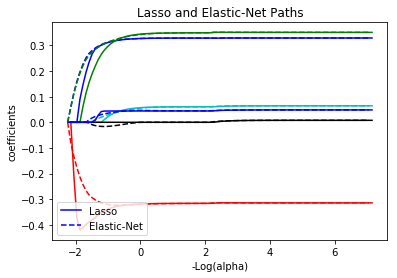

In [12]:
np.random.seed(42)
def generate_normal(size=1000):
    return np.random.normal(loc=0, scale=1, size=size)
z1 = np.random.uniform(low=0, high=20, size=1000)
z2 = np.random.uniform(low=0, high=20, size=1000)
eps = generate_normal()


y = z1 + 0.1*z2 + eps

eps1 = generate_normal()
x1 = z1 + eps1

eps2 = generate_normal()
x2 = -z1 + eps2

eps3 = generate_normal()
x3 = z1 + eps3

eps4 = generate_normal()
x4 = z2 + eps4

eps5 = generate_normal()
x5 = -z2 + eps5

eps6 = generate_normal()
x6 = z2 + eps6





X = np.vstack([x1, x2, x3, x4, x5, x6]).T
eps = 5e-10
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)
    
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')
